# Classifying Electrocardiograms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## (1) Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 rows

In [2]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv"
data = pd.read_csv(url)

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


💓 Each observation of the dataset is a sequence of measured heartbeats, taken from a patient's electrocardiogram (ECG).

🎯 The target is binary and defines whether the heartbeat shows:
* a risk of cardiovascular disease 🔴 (1)
* or not 🟢 (1)

## (2) Data Exploration

❓ **Question** ❓

Plot an observation of each target class to get a visual idea of what the numbers represent.

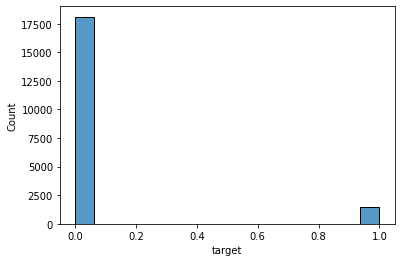

In [3]:
sns.histplot(data=data, x='target');

❓ **Questions** ❓

* How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [4]:
at_risk_count = data['target'].sum()
at_risk_count

1448

* How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [5]:
healthy_count = len(data) - at_risk_count
healthy_count

18117

👩🏻‍🏫 In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution to train the model based on reality, and adapt our modeling approach accordingly.

🧪 **Check your code**

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



##  (3) Logistic Regression

🎯 Your task is to **flag heartbeats that are at risk of cardiovascular diseases.**

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use a ***cross-validation to evaluate the model*** on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = data.drop(columns='target')
y = data['target']

scores = cross_validate(LogisticRegression(max_iter=1000), X, y, scoring=[ 'accuracy', 'recall', 'precision', 'f1' ])
scores

{'fit_time': array([2.18202209, 2.1609652 , 1.73643589, 1.45589805, 1.60711169]),
 'score_time': array([0.02849865, 0.02918029, 0.02532005, 0.02571034, 0.0254643 ]),
 'test_accuracy': array([0.93892154, 0.93892154, 0.93994378, 0.93841043, 0.93968822]),
 'test_recall': array([0.29655172, 0.35517241, 0.36206897, 0.32871972, 0.30795848]),
 'test_precision': array([0.7107438 , 0.66451613, 0.67741935, 0.66901408, 0.712     ]),
 'test_f1': array([0.41849148, 0.46292135, 0.47191011, 0.44083527, 0.42995169])}

❓ **Question (Ratio of correct predictions)** ❓ 

What is the ratio of correct predictions for this model ? Save your answer under variable name `correct_pred_ratio`.

In [8]:
correct_pred_ratio = scores['test_accuracy'].mean()
correct_pred_ratio

0.9391771019677997

❓ **Question (Ability to flag at-risk patients)** ❓ 

What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [9]:
flag_ratio = scores['test_recall'].mean()
flag_ratio

0.3300942608280635

❓ **Question (Ability to flag correctly)** ❓ 

When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [10]:
correct_detection_ratio = scores['test_precision'].mean()
correct_detection_ratio

0.6867386740061804

❓ **Question (Detecting as many at-risk patients as possible without too many false alarms)** ❓ 

What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [11]:
aggregated_metric = scores['test_f1'].mean()
aggregated_metric

0.44482198050033483

🧪 **Check your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commit -m 'Completed logistic_regression_evaluation step'

gi

▶️ Run the following cell before moving on:

In [20]:
print(f"You should have noticed that the model was able to predict correctly in {int(round(correct_pred_ratio,2)*100)} cases out of 100. ")

print(f"However, it was able to capture only {round(flag_ratio,2)*100} % of the at-risk patients")

print("Why ? Let's print a confusion matrix!")


You should have noticed that the model was able to predict correctly in 94 cases out of 100. 
However, it was able to capture only 33.0 % of the at-risk patients
Why ? Let's print a confusion matrix!


## (4) Confusion Matrix

👇 Using `plot_confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

    
1. [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)    
2. ['ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
    
- Don't forget to to go back to the **Holdout method** to [`train-test-split`]((https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) your dataset and look at the confusion matrix on the test set.  
</details>



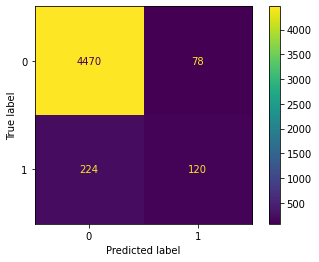

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred)

ConfusionMatrixDisplay(conf_matrix).plot();

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts the heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a **high accuracy**. However, this also causes it to miss out on many at-risk heartbeats: it has **bad recall**...

👉 This model is therefore poor at the task of **flagging at-risk observations**.

❗️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ❗️

## (5) KNN Classifier

❓ **Question (Classification Model Selection)** ❓ 

Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

/home/quantium/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


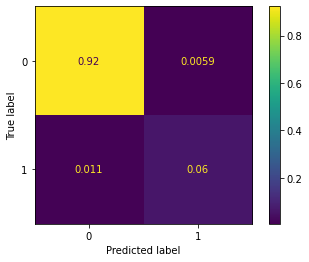

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

X = data.drop(columns='target')
y = data['target']

model = KNeighborsClassifier().fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test, normalize='all');

In [30]:
best_model = 'KNN'

💪 For this ECG dataset, the KNN Classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.

🧪 **Check your code**

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



## (6) Classification Report

Now that we have selected the KNN model thanks to its higherbest recall, let's have a look at the other classification performance metrics>

❓ **Question (Classification Report)** ❓

Print out a [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) of the KNN model.

<details>
    <summary> 💡 <i>Hint</i>  </summary>
    
* You will need to pass the predictions of the model to a `classification_report`.
    
* SkLearn's [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) might help 😉
</details>




In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data.drop('target',axis=1)
y = data['target']

model = KNeighborsClassifier().fit(X_train, y_train)
y_preds = model.predict(X_test)

report = pd.DataFrame(classification_report(y_test, y_preds,output_dict=True))
report

,0,1,accuracy,macro avg,weighted avg
precision,0.988393,0.910798,0.983274,0.949596,0.982889
recall,0.993666,0.847162,0.983274,0.920414,0.983274
f1-score,0.991022,0.877828,0.983274,0.934425,0.982993
support,5999.000000,458.000000,0.983274,6457.000000,6457.000000


❓ **Question (Reading the report)** ❓


Among the heartbeats predicted at-risk, what is the ratio of correct predictions ? 

In mathematical terms, can you read the ratio $ \frac{TP}{TP + FP} $ in the report? What is the name of this classification metrics ? 

Save your answer as a float under `correct_atrisk_predictions`

In [33]:
correct_atrisk_predictions = report['1']['precision']
correct_atrisk_predictions

0.9107981220657277

🧪 **Check your code**

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_atrisk_predictions)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_precision.py::TestPrecision::test_precision PASSED                  [100%]

============================== 1 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master



## (7) Prediction

❓ **Question (Predicting)** ❓

A patient comes to you for a second opinion because  he was told that based on his heartbeats, this patient may be at-risk.  

According to your optimal model, is he at-risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [37]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')
new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
patient_pred = model.predict(new_patient)
patient_pred

array([1])

In [39]:
prediction = 'at risk'

🧪 **Check your code**

In [40]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction_at_risk PASSED       [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



🏁 Congratulations!

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!